<a href="https://colab.research.google.com/github/Borson277/Salary-Prediction-model/blob/main/Salary_Prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('/content/salary.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
df.shape

(32561, 15)

In [5]:
df = df.drop(['workclass','fnlwgt','education','marital-status','occupation', 'relationship','race','sex','capital-loss','native-country'], axis=1)

In [6]:
df.head()

,age,education-num,capital-gain,hours-per-week,salary
0,39,13,2174,40,<=50K
1,50,13,0,13,<=50K
2,38,9,0,40,<=50K
3,53,7,0,40,<=50K
4,28,13,0,40,<=50K


In [8]:
df["salary"] = df["salary"].str.strip()
df['salary'] = df['salary'].map({"<=50K":0,">50K":1}).astype(int)

In [9]:
df.tail()

,age,education-num,capital-gain,hours-per-week,salary
32556,27,12,0,38,0
32557,40,9,0,40,1
32558,58,9,0,40,0
32559,22,9,0,20,0
32560,52,9,15024,40,1


In [10]:
pd.DataFrame({'h' : df.nunique().index, 'null' : df.isnull().sum()})

,h,null
age,age,0
education-num,education-num,0
capital-gain,capital-gain,0
hours-per-week,hours-per-week,0
salary,salary,0


In [11]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [12]:
x.head()

,age,education-num,capital-gain,hours-per-week
0,39,13,2174,40
1,50,13,0,13
2,38,9,0,40
3,53,7,0,40
4,28,13,0,40


In [13]:
y.head()

,salary
0,0
1,0
2,0
3,0
4,0


In [14]:
from sklearn.model_selection import train_test_split

x_train , x_test ,y_train, y_test = train_test_split(x,y, test_size=.25, random_state=0)

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)



Text(0, 0.5, 'Mean Error')

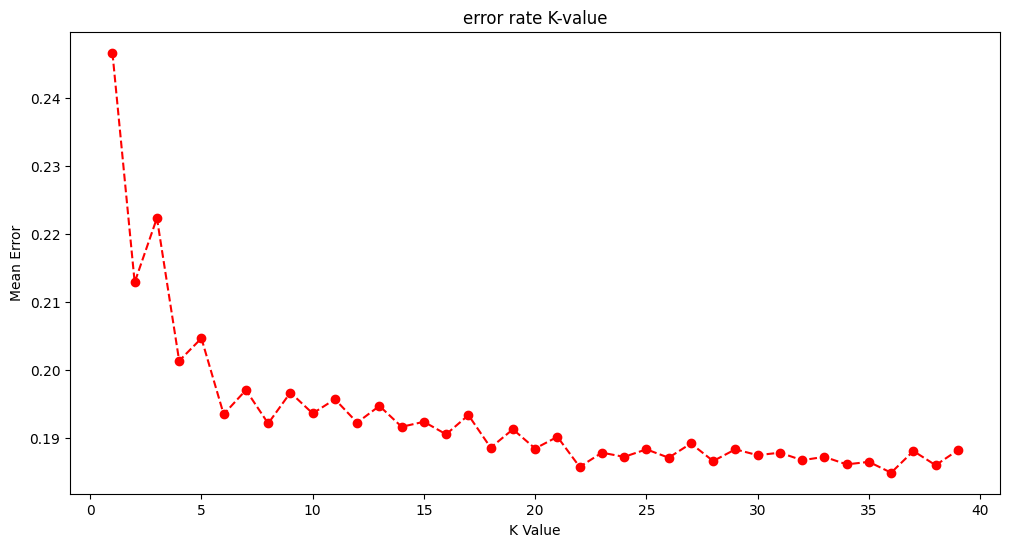

In [18]:
#finding K values

error = []
from sklearn.neighbors import  KNeighborsClassifier

for i in range (1,40):
  model = KNeighborsClassifier(n_neighbors=i)
  model.fit(x_train,y_train)
  pred_i = model.predict(x_test)
  error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12,6))
plt.plot(range(1,40),error,color = 'red',linestyle = 'dashed',marker ='o')
plt.title("error rate K-value")
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [19]:
model = KNeighborsClassifier(n_neighbors = 36 , metric = 'minkowski',p = 2 )
model.fit(x_train,y_train)

y_pred = model.predict(x_test)


In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score
print("Accuracy model: {0}%".format(accuracy_score(y_test,y_pred)*100))


Accuracy model: 81.51332760103182%


In [22]:
 age = int(input("Enter Age: "))
 edu = int(input("Enter Education Level: "))
 cg  = int(input("Enter Capital gain: "))
 wh  = int(input("Enter working hours per week: "))

 NewEmployee_df = pd.DataFrame([[age, edu, cg, wh]], columns=x.columns)

 result  = model.predict(sc.transform(NewEmployee_df))
 print(result)

 if result == 1:
    print("The salary is likely above 50K.")
 elif result == 0:
    print("The salary is likely below 50k.")

Enter Age: 24
Enter Education Level: 20
Enter Capital gain: 3000
Enter working hours per week: 24
[0]
The salary is likely below 50k.
